In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from IPython.display import display
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

file_path = r'C:\Users\CHOI.DESKTOP-R51MDOU\OneDrive - 가천대학교\바탕 화면\Coding\AI Introduction\heart.csv'
df = pd.read_csv(file_path)

#데이터 시각화
display(df)
print(df.columns)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [2]:
missing_values = df.isnull().sum()

print(missing_values)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [3]:
X = df.drop('target', axis = 1)
y = df['target']

#trained data와 test data 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 12)


print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(242, 13) (242,)
(61, 13) (61,)


In [4]:
#원-핫 엔코딩 
Y = pd.get_dummies(y).values
X = X.values

In [64]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

model = Sequential()

# 신경망 생성 --> 뉴런 갯수, active 방식.
model.add(Dense(15, input_shape = (13,), activation = 'relu'))
model.add(Dense(30, activation = 'relu'))
model.add(Dense(40, activation = 'relu'))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(Adam(learning_rate = 0.01), 'binary_crossentropy', metrics = ['accuracy'])

model.summary()

C:\Users\CHOI.DESKTOP-R51MDOU\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_60 (Dense)                     │ (None, 15)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_61 (Dense)                     │ (None, 30)                  │             480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_62 (Dense)                     │ (None, 40)                  │           1,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_63 (Dense)                     │ (None, 20)                  │             820 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_64 (Dense)                     │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,771 (10.82 KB)

 Trainable params: 2,771 (10.82 KB)

 Non-trainable params: 0 (0.00 B)

In [65]:
#예측 시작
model_history = model.fit(x = X_train, y = y_train, epochs = 30, batch_size = 19, validation_data = (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.5108 - loss: 3.8524 - val_accuracy: 0.4918 - val_loss: 1.6864
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5459 - loss: 1.0153 - val_accuracy: 0.5082 - val_loss: 0.8457
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5080 - loss: 0.7637 - val_accuracy: 0.6230 - val_loss: 0.6447
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5710 - loss: 0.6372 - val_accuracy: 0.5738 - val_loss: 0.6626
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6254 - loss: 0.6703 - val_accuracy: 0.4918 - val_loss: 0.8604
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6287 - loss: 0.6700 - val_accuracy: 0.6721 - val_loss: 0.6363
Epoch 7/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6666 - loss: 0.6227 - val_accuracy: 0.6885 - val_loss: 0.6498
Epoch 8/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6750 - loss: 0.6129 - val_accuracy: 0.6557 - v

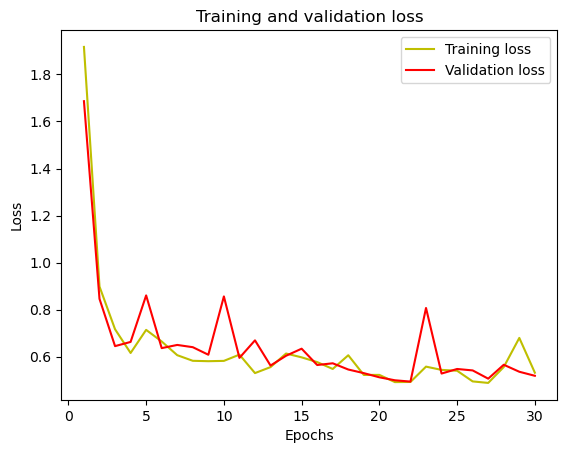

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

#딥러닝 결과를 graph로 출력. loss/accuracy로 나누어서 출력합니다
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

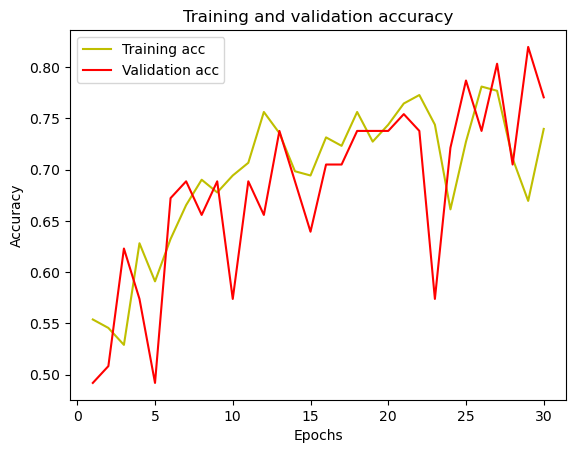

In [67]:
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()